In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Flipr Hackathons/Hackathon 6.0/Train_dataset.xlsx')
df_test = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Flipr Hackathons/Hackathon 6.0/Test_dataset.xlsx')

In [3]:
display(df_train.head())
print(df_train.shape)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


(787, 16)


In [4]:
df_train.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [5]:
df_train.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [6]:
df = df_train.drop(['City', 'Popuation [2001]', 'Female Population', 'State', 'Type'], axis = 1)
df.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors,Covid Cases
0,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,159.0,4408916.0,163115
1,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,148.0,2379169.0,80188
2,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,123.0,636502.0,141000
3,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,110.0,126078.0,55123
4,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,73.0,284973.0,33204


In [7]:
df1 = df_test.drop(['City', 'Popuation [2001]', 'Female Population', 'State', 'Type'], axis = 1)
df1.head()

,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors
0,36774.0,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,17.0,2769.0
1,36754.0,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,13.0,636502.0
2,36732.0,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,17.0,242367.0
3,36706.0,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,11.0,4408916.0
4,36669.0,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,23.0,3104060.0


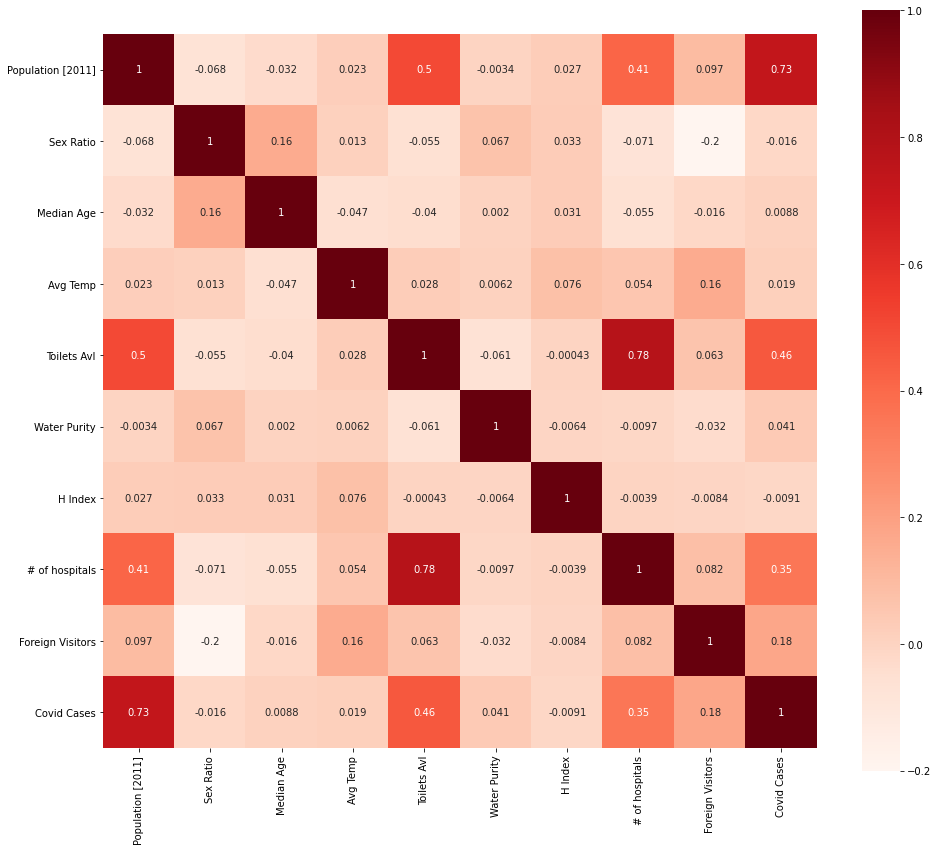

In [8]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.Reds, square=True)

In [9]:
df["Population [2011]"].fillna(method='ffill', inplace = True)
df['Sex Ratio'].fillna(df['Sex Ratio'].median(), inplace = True)
df['Median Age'].fillna(df['Median Age'].median(), inplace = True)
df['Avg Temp'].fillna(df['Avg Temp'].median(), inplace = True)
df['Toilets Avl'].fillna(pd.Series(np.random.choice([65.0,66.0,90.0],p = [0.33,0.33,0.34],size =len(df))), inplace = True)
df['SWM'].fillna(df['SWM'].mode()[0], inplace = True)
df['Water Purity'].fillna(method = 'ffill', inplace = True)
df['H Index'].fillna(df['H Index'].mean(), inplace = True)
df['# of hospitals'].fillna(method='ffill', inplace = True)
df['Foreign Visitors'].fillna(method='ffill', inplace = True)

In [10]:
df1["Population [2011]"].fillna(method='ffill', inplace = True)
df1['Sex Ratio'].fillna(df1['Sex Ratio'].median(), inplace = True)
df1['Median Age'].fillna(df1['Median Age'].median(), inplace = True)
df1['Avg Temp'].fillna(df1['Avg Temp'].median(), inplace = True)
df1['Toilets Avl'].fillna(pd.Series(np.random.choice([65.0,66.0,90.0],p = [0.33,0.33,0.34],size =len(df1))), inplace = True)
df1['SWM'].fillna(df1['SWM'].mode()[0], inplace = True)
df1['Water Purity'].fillna(method = 'ffill', inplace = True)
df1['H Index'].fillna(df1['H Index'].mean(), inplace = True)
df1['# of hospitals'].fillna(method='ffill', inplace = True)
df1['Foreign Visitors'].fillna(method='ffill', inplace = True)

In [11]:
temp = df.copy()
mnx = StandardScaler()
temp.SWM = df.SWM.replace({'LOW':1, 'MEDIUM':2, 'HIGH':3})
temp['Population [2011]'] = mnx.fit_transform(temp['Population [2011]'].values.reshape(-1, 1))
temp['Sex Ratio'] = mnx.fit_transform(temp['Sex Ratio'].values.reshape(-1, 1))
temp['Median Age'] = mnx.fit_transform(temp['Median Age'].values.reshape(-1, 1))
temp['Avg Temp'] = mnx.fit_transform(temp['Avg Temp'].values.reshape(-1, 1))
temp['Toilets Avl'] = mnx.fit_transform(temp['Toilets Avl'].values.reshape(-1, 1))
temp['Water Purity'] = mnx.fit_transform(temp['Water Purity'].values.reshape(-1, 1))
temp['H Index'] = mnx.fit_transform(temp['H Index'].values.reshape(-1, 1))
temp['# of hospitals'] = mnx.fit_transform(temp['# of hospitals'].values.reshape(-1, 1))
temp['Foreign Visitors'] = mnx.fit_transform(temp['Foreign Visitors'].values.reshape(-1, 1))
print(temp.shape)
temp.head()

(787, 11)


,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors,Covid Cases
0,14.046615,-0.754011,-1.522893,0.153478,2,4.074159,-0.007457,0.765010,4.014013,1.469811,163115
1,12.386276,-1.298096,0.393201,-0.136876,2,3.942389,1.638701,1.590990,3.635806,0.348480,80188
2,9.410407,0.823836,0.872225,0.879363,3,3.843561,-1.725188,-1.504603,2.776244,-0.614254,141000
3,7.527654,0.660611,-1.522893,0.008301,2,4.008274,-1.152611,1.243887,2.329271,-0.896237,55123
4,6.093186,-1.461322,1.351248,-0.862761,1,4.337699,-1.474685,1.319861,1.057119,-0.808455,33204


In [12]:
df1.SWM = df1.SWM.replace({'LOW':1, 'MEDIUM':2, 'HIGH':3})
df1['Population [2011]'] = mnx.fit_transform(df1['Population [2011]'].values.reshape(-1, 1))
df1['Sex Ratio'] = mnx.fit_transform(df1['Sex Ratio'].values.reshape(-1, 1))
df1['Median Age'] = mnx.fit_transform(df1['Median Age'].values.reshape(-1, 1))
df1['Avg Temp'] = mnx.fit_transform(df1['Avg Temp'].values.reshape(-1, 1))
df1['Toilets Avl'] = mnx.fit_transform(df1['Toilets Avl'].values.reshape(-1, 1))
df1['Water Purity'] = mnx.fit_transform(df1['Water Purity'].values.reshape(-1, 1))
df1['H Index'] = mnx.fit_transform(df1['H Index'].values.reshape(-1, 1))
df1['# of hospitals'] = mnx.fit_transform(df1['# of hospitals'].values.reshape(-1, 1))
df1['Foreign Visitors'] = mnx.fit_transform(df1['Foreign Visitors'].values.reshape(-1, 1))
print(df1.shape)
df1.head()

(501, 10)


,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors
0,1.535902,0.929532,-1.473803,-2.090804,2,1.059739,-1.335177,-0.885343,-0.274894,-0.977055
1,1.533352,1.007991,-0.528380,0.965657,3,-0.504406,0.289624,-1.102826,-0.853557,-0.602426
2,1.530547,-0.325818,1.362465,0.638179,3,-0.455526,-1.653073,1.382935,-0.274894,-0.835417
3,1.527231,-0.221205,-0.055669,0.201542,3,-0.602165,0.784129,-0.333198,-1.142888,1.627622
4,1.522513,-0.482736,0.889754,1.074816,1,0.961980,0.042372,-0.631286,0.593101,0.856261


In [13]:
y = temp['Covid Cases']
x = temp.drop(['Covid Cases'], axis = 1)

In [14]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, random_state=0)

In [15]:
randreg = RandomForestRegressor(random_state=0, max_depth = 3, max_features = "sqrt", min_samples_split=8).fit(xtrain, ytrain)
# print(" Training score : {}".format(randreg.score(xtrain, ytrain)))
# print("Validation score: {}".format(randreg.score(xvalid, yvalid)))

In [16]:
predictions = randreg.predict(df1)

In [17]:
df_result = pd.DataFrame(df_test.City, columns = ["City", "Covid Cases"])
df_result['Covid Cases'] = predictions
df_result.head()

,City,Covid Cases
0,Tuensang,6950.253809
1,Lakshmeshwar,5236.153936
2,Zira,5480.184752
3,Yawal,6759.748566
4,Thana Bhawan,9993.929866


In [18]:
df_result.to_excel("/content/drive/My Drive/Colab Notebooks/Flipr Hackathons/Hackathon 6.0/part1_output.xlsx")